### How we want to read our dataset
* df = pd.read_csv("iris.csv") #read our data into our dataframe

### Here we sort of layout the main goal functions we require 

The goal is to create a sort of API with these functions below:

* train_df, test_df = train_test_split(df, test_size_proportion = 0.2) #split into train and test
* tree = decision_tree_algorithm(train_df) #run the decision tree algorithm
* accuracy = calculate_accuracy(test_df,tree) #call to calculate accuracy

The algorithm we're trying to implement follows the following logic 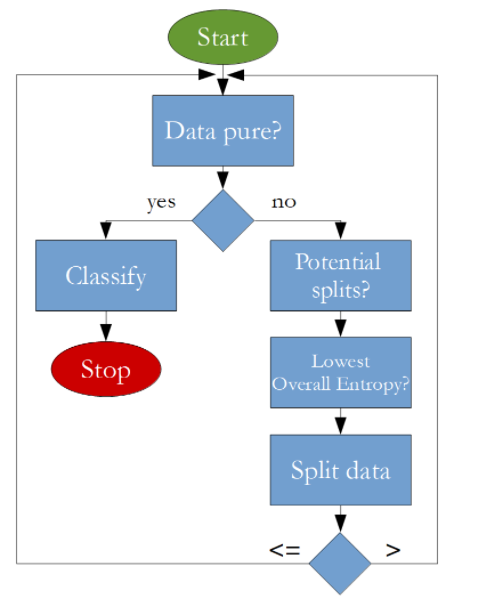

# Import Statements

In [49]:
import numpy as np #one of the main libraries used to build the function
import pandas as pd   #one of the main libraries used to build the function

import matplotlib.pyplot as plt # one of the plotting libraries to see if the functions are doing what they're supposed to do 
import seaborn as sns # one of the plotting libraries to see if the functions are doing what they're supposed to do
sns.set_style("darkgrid")
%matplotlib inline 
#this just makes sure the plots we create are displayed in this notebook

import random #used for train test function
from pprint import pprint #to print tree in a way which is easy to understand

## Load and Prepare Data

##### Format of the data
* last column of the data frame must contain the label and it must also be called "label"
* there should be no missing values in the dataframe

In [51]:
df = pd.read_csv("iris.csv")
df = df.rename(columns={"type": "label"}) #rename known prediction value to be label
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Train-test-Split Function

In [52]:
def train_test_split(df, test_size):
    if isinstance(test_size, float):  #this is to eliminate if the test size is a float value, if it is a proportion we use this
        test_size = round(test_size * len(df)) #round function is used to eliminate if the test size is a float value

    indices = df.index.tolist() #to access the index values and transform it into a list with tolist() method
    test_indices = random.sample(population = indices, k = test_size) #the population is the total population and second argument, k is no. of data attributes that we want from the population
    
    test_df = df.loc[test_indices] #allows us to only access certain rows and the test_indices are the selected tested m
    train_df = df.drop(test_indices) #this allows us to access and assign train_df values other than the test data rows

    return train_df, test_df

In [53]:
random.seed(0)
train_df, test_df = train_test_split(df, test_size = 0.2)

## Helper Functions

In [54]:
data = train_df.values #this is to convert our data to a numpy 2d array
data[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Setosa']], dtype=object)

#### Data Pure or not?

In [55]:
def check_purity(data): 
    label_column = data[:, -1] #This is to access all the different labels there are in the data
    unique_classes = np.unique(label_column) #np.unique function gives us the # of unique values of the label column

    if len(unique_classes) == 1: #if the length of the unique_classes variable is 1 the data is pure otherwise false 
        return True
    else:
        return False

#### Classify

In [56]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True) #this function with the second argument returns=True gives 
                                                                                    # us the count which can help in classification    
                                                                                    # this returns 2 arrays which give the count and unique classes

    index = counts_unique_classes.argmax() # returns index of the largest value in the array
    classification = unique_classes[index] # the index value above can be used to access the majority class 
                                            # and thats the classification
    
    return classification

#### Potential Splits ?

In [57]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape #blank underscore is cause we dont need to store that value
    for column_index in range(n_columns -1): #we do -1 while accessing cause the last column has the labels
        potential_splits[column_index] = [] #for each column we create an entry in our splits dictionary
        values = data[:, column_index] #we use this to access values for each row 
        unique_values = np.unique(values) #to reduce computation over same values we only use the unique values

        for index in range(len(unique_values)):
            if index!=0:                                   
                current_value = unique_values[index]       # iterate over unique values array add previous element to
                previous_value = unique_values[index - 1]  # that and divide the sum by two and thats the potential split
                potential_split = (current_value + previous_value) / 2
            
                potential_splits[column_index].append(potential_split) #we append it to the respective column 
        
    return potential_splits

#### Split Data 

In [58]:
def split_data(data, split_column, split_value):

    split_column_values = data[:, split_column] #all values which we are meant to split

    data_below = data[split_column_values <= split_value] #array of values below the split point 
    data_above = data[split_column_values > split_value] #array of values above the split point
    
    return data_below, data_above #2 numpy 2d arrays which are below and above the split point

#### Lowest Overall Entropy Function
We will use this as the main determinant however there are 2 other ways described below.

* Information Gain
* Gini Index

We are using this as it is more intuitive as compared to information gain and gini index.

In [59]:
def calculate_entropy(data):
    
    label_column = data[:,-1]
    _, counts = np.unique(label_column, return_counts=True) #to store the count of different label data in the dataset

    probabilities = counts / counts.sum() #to calculate probabilities of each group

    #ENTROPY FORMULA
    entropy = sum(probabilities * -np.log2(probabilities)) #entropy formula from lecture notes and 
    
    return entropy  

In [60]:
def calculate_overall_entropy(data_below, data_above):  # it has the advantage over infomation gain as the lowest overall entropy
    n_data_points = len(data_below) + len(data_above)   # is a little more intuitive as compared to information gain 

    p_data_below = len(data_below) / n_data_points
    p_data_above = len(data_above) / n_data_points
    
    overall_entropy = (p_data_below * calculate_entropy(data_below)+
                        p_data_above * calculate_entropy(data_above))

    return overall_entropy

#### Information Gain
Alternatively i'll code Information gain as well

In [61]:
def information_gain(data_below, data_above):
    n_data_points = len(data_below) + len(data_above)   

    p_data_below = len(data_below) / n_data_points
    p_data_above = len(data_above) / n_data_points
    
    info_gain = ((calculate_entropy(data_below)+calculate_entropy(data_above)) -
                p_data_below *calculate_entropy(data_below) + p_data_above * calculate_entropy(data_above))

    return info_gain

#### Gini Index
Alternatively, Gini Index is another way of doing it

In [62]:
def gini_index(data_below, data_above):  
    n_data_points = len(data_below) + len(data_above)    

    p_data_below = len(data_below) / n_data_points
    p_data_above = len(data_above) / n_data_points
    
    gini_index = p_data_below**2 + p_data_above**2

    return 1-gini_index

### Determine best split 

In [63]:
def determine_best_split(data, potential_splits):
    #potential_splits is a dictionary which has a column indices key and potential split values as values in that   
    
    overall_entropy = 999 #to have a base entropy which can be changed later
    for column_index in potential_splits: #this will loop over all keys
        for value in potential_splits[column_index]: #this will loop over all values
            data_below, data_above = split_data(data, split_column=column_index, split_value=value) #to calculate the overall entropy
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy # Set the values of the current split as the lowest entropy if the 
                best_split_column = column_index          # condition above comes to be true i.e. the entropy is lower
                best_split_value = value   
    
    return best_split_column, best_split_value

## Decision Tree Algorithm

We have all the helper functions and now we can create the main algorithm

#### Representation of the Decision Tree 

In [64]:
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]} 
#here we create a representation of the subtree

In [65]:
example_tree = {"petal_width <= 0.8": ["Setosa", #dicitonary only has 1 key and i.e. the question we will ask
                                       {"petal_width <= 1.65":[{"petal_length <= 4.9": ["Versicolor", 
                                                                                        "Virginica",]},
                                                              "Virginica"]}]} 

#### Algorithm

In [66]:
def decision_tree_algorithm(df, counter = 0, min_samples=2, max_depth=5): # we will transform pandas dataframe into a numpy 2d array here
                                                            # min samples is basically a pruning argument to get less layers
                                                            # max_depth for number of layers
    # DATA PREPARATION
    if counter == 0:
        #here the df comes in handy as we can access the column names easily
        # here we also specify it to be a global variable to avoid the unbound local error
        global COLUMN_HEADERS
        COLUMN_HEADERS = df.columns        
        data = df.values #essentially the condiition above is if it is the root note
    else: 
        data = df 
        
    # Base Case 
    # here we define stopping conditions of the recurisive call 
    if (check_purity(data) or len(data) < min_samples) or (counter == max_depth):
        classification = classify_data(data)
        return classification
    
    #recursive part if we don't stop
    else: 
        counter += 1 #increase counter of the tree
            
        #helper functions getting called now
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        #instantiante sub-tree 
        feature_name = COLUMN_HEADERS[split_column]
        question = "{} <= {}".format(feature_name, split_value) #to create the dictionary
        sub_tree = {question: []}
        
        #find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter, min_samples, max_depth) #to create the valeus of the list
        no_answer = decision_tree_algorithm(data_above, counter, min_samples, max_depth)
        
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer) # here we append the answers to the representation of the tree
        
        return sub_tree
    

In [67]:
#Testing our function above
tree = decision_tree_algorithm(train_df, max_depth = 3)
pprint(tree) #to check our tree function above 

{'petal_width <= 0.8': ['Setosa',
                        {'petal_width <= 1.65': [{'petal_length <= 4.95': ['Versicolor',
                                                                           'Virginica']},
                                                 'Virginica']}]}


## Classification 

In [68]:
sub_tree

{'question': ['yes_answer', 'no_answer']}

In [69]:
example = test_df.iloc[2]
example

sepal_length       5.4
sepal_width        3.7
petal_length       1.5
petal_width        0.2
label           Setosa
Name: 10, dtype: object

In [70]:
def classify_example(example, tree):
    # here we will ask a question about our example about an attribute and if the answer is we pick first element and 
    # if the answer is no we pick the second element and then in the next step we'll check what type of an element it is
    # if its a class we are done with classification but if its another question, in that case we will ask the question again
    # and another sub-tree will start (recursive) until our answer is eventually a class
    
    # base case applies when our answer is a class (not a dictionary) 
    question = list(tree.keys())[0] #since dictionary keys are not scriptable we convert it into a list
    feature_name, comparision_operator, value = question.split() #assign variable to different parts of the question

    #ask a question 
    if example[feature_name] <= float(value):
        answer = tree[question][0]
    else:
        answer = tree[question][1]

    #base case
    if not isinstance(answer, dict):
        return answer

    #recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)  #this can return the specific classification result
     

In [71]:
#testing the function above
classify_example(example, tree)

'Setosa'

## Calculate Accuracy

In [72]:
def calculate_accuracy(df, tree):
    
    df["classification"] = df.apply(classify_example, axis=1, args=(tree,)) #tree, is needed since a tuple input is required
    df["classification_correct"] = df.classification == df.label #we will cheeck whether classification is correct or not
    
    accuracy = df.classification_correct.mean()
    
    return accuracy

In [73]:
accuracy = calculate_accuracy(test_df, tree)
accuracy

0.9666666666666667

In [75]:
# HERE WE CALL THE API WE HAVE BUILT
train_df, test_df = train_test_split(df, test_size=0.2)
tree = decision_tree_algorithm(train_df, max_depth=3)
accuracy = calculate_accuracy(test_df, tree)

pprint(tree)
print(accuracy)

{'petal_width <= 0.8': ['Setosa',
                        {'petal_width <= 1.65': [{'petal_length <= 4.95': ['Versicolor',
                                                                           'Virginica']},
                                                 'Virginica']}]}
0.9666666666666667


# Working on WineDataset

In [108]:
df = pd.read_csv("wine.csv")
df.head()


,Proline,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Wine
0,1065,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1
1,1050,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1
2,1185,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1
3,1480,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1
4,735,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,1


### Preprocessing

In [109]:
df = df.rename(columns={"Wine": "label"}) #rename known prediction value to be label
df.head()

,Proline,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,label
0,1065,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1
1,1050,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1
2,1185,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1
3,1480,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1
4,735,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,1


In [110]:
train_df, test_df = train_test_split(df, test_size=0.2)
tree = decision_tree_algorithm(train_df, max_depth=7)
accuracy = calculate_accuracy(test_df, tree)

pprint(tree)
print(accuracy)

{'Flavanoids <= 1.5750000000000002': [{'Hue <= 0.9299999999999999': [{'Color.int <= 3.625': [2.0,
                                                                                             3.0]},
                                                                     2.0]},
                                      {'Proline <= 760.0': [{'Alcohol <= 13.145': [2.0,
                                                                                   {'OD <= 2.8899999999999997': [2.0,
                                                                                                                 1.0]}]},
                                                            {'Color.int <= 3.435': [2.0,
                                                                                    1.0]}]}]}
0.9444444444444444
